In [1]:
!python -V

Python 3.9.7


In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pickle

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [6]:
df_train = read_dataframe('./green_tripdata_2022-01.parquet')
df_val = read_dataframe('./green_tripdata_2022-02.parquet')

In [7]:
len(df_train), len(df_val)

(59603, 66097)

In [8]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [9]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

8.19383252048153

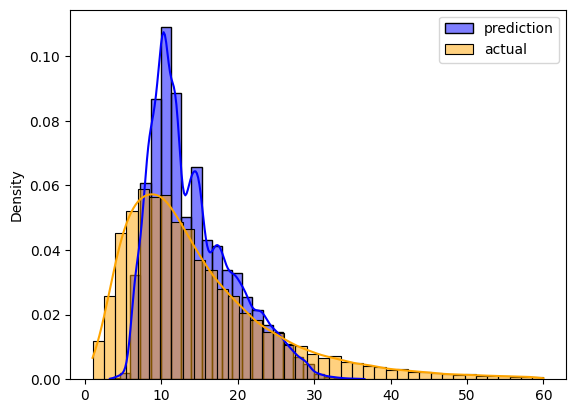

In [11]:
sns.histplot(y_pred, kde=True, stat="density", color='blue', bins=25, label='prediction')
sns.histplot(y_val, kde=True, stat="density", color='orange', bins=40, label='actual')

plt.legend()

In [12]:
with open('lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)